In [0]:
import numpy as np
lower_weigth = 100
upper_weigth = 200
size = 50
weights = np.random.randint(lower_weigth, upper_weigth, size)
prices = np.random.randint(0, 100, size)
total_weigth = np.random.randint(sum(weights) / 2, sum(weights) / 4 * 3)

In [0]:
def init(size_):
  global size
  global weights
  global prices
  global total_weigth
  lower_weigth = 100
  upper_weigth = 300
  size = size_
  weights = np.random.randint(lower_weigth, upper_weigth, size)
  prices = np.random.randint(0, 100, size)
  total_weigth = np.random.randint(sum(weights) / 2, sum(weights) / 4 * 3)

In [0]:
dynamic_algo_time = []
probabilistic_algo_time = []
import time
def timer(f):
    def tmp(*args, **kwargs):
        t = time.time()
        res = f(*args, **kwargs)
        finaltime = time.time()-t
        # print ("Время выполнения функции %s: %f" % (f.__name__, finaltime))
        if (f.__name__ == "dymanic_algo"):
          dynamic_algo_time.append(finaltime)
        if (f.__name__ == "probabilistic_algo"):
          probabilistic_algo_time.append(finaltime)
        return res

    return tmp


In [0]:
@timer
def dymanic_algo():
  m = [[0 for j in range(total_weigth + 1)]  for i in range(size + 1)]
  for i in range(1, size + 1):
      for w in range(0, total_weigth + 1):
          if (weights[i - 1] > w):
              m[i][w] = m[i-1][w]
          else:
              m[i][w] = max(m[i-1][w], m[i-1][w-weights[i-1]] + prices[i - 1])
  #print('Weights: '+str(weights))
  #print('Prices:  '+str(prices))
  #print('W:       '+str(total_weigth))
  # print('Result:  '+str(m[size][total_weigth]))
  return m[size][total_weigth]


In [0]:
import random as rand

class Item:
    def __init__(self, i):
        self.w = weights[i]
        self.p = prices[i]
        self.profit = prices[i]/weights[i]
        self.index = i
        self.active = True

def remove_bad_items(items, current_weigth):
    for i in range (0, len(items)):
        if (items[i].w > current_weigth):
            items[i].active = False


def get_probabilities(items):
    result = [];
    for i in range(0, len(items)):
       if (items[i].active):
            result.append(items[i].profit)
    return result

def get_active(items):
    result = [];
    for i in range(0, len(items)):
        if (items[i].active):
            result.append(items[i].index)
    return result

def probabilistic_algo_iteration():
  items = []
  for i in range (0, size):
      items.append(Item(i))
  need_stop = False
  current_weigth = total_weigth
  final_result = [];
  while (1):
      remove_bad_items(items, current_weigth)
      probabilities = get_probabilities(items)
      if (len(probabilities) == 0):
          break
      index = rand.choices(get_active(items), probabilities)[0]
      final_result.append(index)
      current_weigth -= weights[index]
      for i in range(0, len(items)):
          if (items[i].index == index):
              items[i].active = False
              break

  price = 0;
  for i in final_result:
      price+=prices[i]

  #print(final_result)
  #print('Result:  '+str(price))
  return price

@timer
def probabilistic_algo(price, percent):
  result = 0
  retries = 0 
  while ( result < price * percent / 100):
    retries = retries + 1
    result = probabilistic_algo_iteration()
  # print('Result:  '+str(result) + ' Retries ' + str(retries))
  return result

def probabilistic_algo_retries(price, percent):
  result = 0
  retries = 0 
  while ( result < price * percent / 100):
    retries = retries + 1
    result = probabilistic_algo_iteration()
  # print('Result:  '+str(result) + ' Retries ' + str(retries))
  return retries

In [0]:
print(dymanic_algo())

1819


50
60
70
80
90
100
110
120
130
140


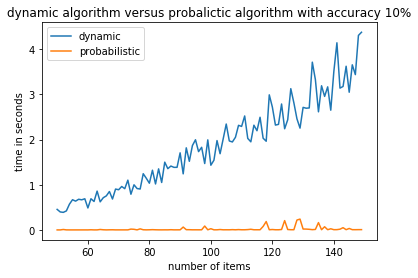

In [0]:
start = 50
end = 150
dynamic_algo_time = []
probabilistic_algo_time = []
price = 0
for i in range (start ,  end):
  init(i);
  price = dymanic_algo()
  probabilistic_algo(price, 90)
  if ((i % 10) == 0):
    print(i)

import matplotlib.pyplot as plt
x = [i for i in range(start, end)]
plt.xlabel("number of items")
plt.ylabel("time in seconds")
plt.title('dynamic algorithm versus probalictic algorithm with accuracy 10%')
plt.plot(x, dynamic_algo_time)
plt.plot(x, probabilistic_algo_time)
plt.legend(['dynamic', 'probabilistic'])

plt.savefig("/home/first_graph.svg")



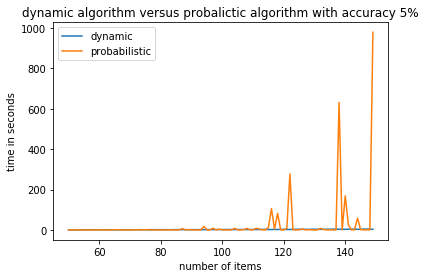

In [0]:
import matplotlib.pyplot as plt
x = [i for i in range(start, end)]
plt.xlabel("number of items")
plt.ylabel("time in seconds")
plt.title('dynamic algorithm versus probalictic algorithm with accuracy 5%')
plt.plot(x, dynamic_algo_time)
plt.plot(x, probabilistic_algo_time)
plt.legend(['dynamic', 'probabilistic'])

plt.savefig("/home/graph.svg")

50
60
70
80
90
91
92
93
94


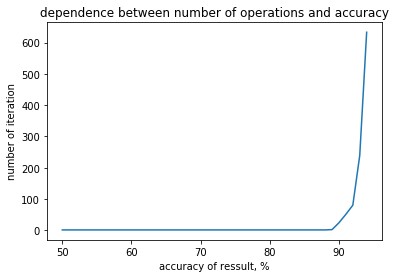

In [0]:
probabilistic_algo_data = []
percent = 95
for i in range (50 ,  percent):
  result = probabilistic_algo_retries(price, i)
  probabilistic_algo_data.append(result)
  if ((i % 10) == 0 or i > 90):
    print(i)
import matplotlib.pyplot as plt
x = [i for i in range(50, percent )]
plt.xlabel("accuracy of ressult, %")
plt.ylabel("number of iteration")
plt.title('dependence between number of operations and accuracy')
plt.plot(x, probabilistic_algo_data)
plt.savefig("/home/second_graph.svg")
